# Walk through: Discovering Fuzzy Partial Periodic Patterns from Big Multiple Time Series Data


> Illustration with 5-year nation-wide air pollution data of Japan



## Introduction

Multiple time series data is ubiqutous. Beneficial patterns that can empower the users with competitive knowledge are hidden in this series. This article describe the process to discover frequently occurring patterns (or frequent patterns) in a multiple time series.  We use the 5-year nation-wide air pollution (PM2.5) data of Japan for illustration purposes.

### Step 1: Download the air pollution dataset [1]



In [1]:
!wget https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv

--2023-08-09 05:52:31--  https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv [following]
--2023-08-09 05:52:31--  https://www.dropbox.com/s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa2527b4d5f02fbc0b42ceb09a.dl.dropboxusercontent.com/cd/0/inline/CBdUx837pTmmBsV19I-2PO0_NSlI6U30WthsVTmiBsZeqdpkne7syQ_-wrVTTFqKYRllPHoBt_e0UqogpHZqkMz2hPo3XbsELekhe1fim6SjYga2hvP_ZAO8-WoZqwkYAJDGemWEgJ4lpJhbi8P5ZBQu/file# [following]
--2023-08-09 05:52:31--  https://ucaa2527b4d5f02fbc0b42ceb09a.dl.dropboxusercontent.com/cd/0/inline/CBdUx837pTmmBsV19I-2PO0_NSlI6U30WthsVTmiBsZeqdpkne7syQ_-wrVTTFqKYRllPHoBt_e0UqogpHZqkMz2hP

### Step 2: Read the dataset and analyze it

In [2]:
import pandas as pd
dataset = pd.read_csv('ETL_DATA_new.csv', index_col=0)

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

,TimeStamp,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,2018-01-01 01:00:00,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,2018-01-01 02:00:00,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,2018-01-01 03:00:00,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,2018-01-01 04:00:00,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,2018-01-01 05:00:00,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,2023-04-25 18:00:00,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,2023-04-25 19:00:00,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,2023-04-25 20:00:00,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


__Format of the dataset:__ timestamp _tabSpace_ sensorLocation1 _tabSpace_ sensorLocation2 _tabSpace_ ... _tabSpace_ sensorLocationN

### Step 3: Preprocessing the multiple time series data



#### Step 3.1: Removing the timestamp column

In [3]:
dataset.drop('TimeStamp', inplace=True, axis=1)
dataset

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,16.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,14.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,13.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


#### Step 3.2: Removing Sensors that do not have Point information

In [4]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head()

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,0.0,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,2.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,3.0,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,5.0,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0


#### Step 3.3: Fillup the missing values (NaN) with zero

In [5]:
dataset = dataset.fillna(0)
dataset.head()

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,18.0,20.0,0.0,0.0,0.0,23.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0
1,0.0,0.0,11.0,12.0,22.0,15.0,0.0,0.0,0.0,32.0,...,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,5.0
2,0.0,0.0,7.0,12.0,19.0,16.0,0.0,0.0,0.0,32.0,...,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0
3,0.0,0.0,5.0,11.0,16.0,11.0,0.0,0.0,0.0,28.0,...,3.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0
4,0.0,0.0,6.0,11.0,10.0,8.0,0.0,0.0,0.0,27.0,...,5.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0


#### Step 3.3: Removing abnormal values in the data

##### Step 3.3.1: Finding the maximum values recorded by each sensor

In [ ]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor
maxValueInEachColumn      #Printing the maxValue of each sensor

Point(139.0794379 36.3727776)             0.0
Point(139.1051411 36.3963822)             0.0
Point(139.0960211 36.4047323)           110.0
Point(139.0428727 36.3816035)            77.0
Point(138.9955116 36.33801589999999)    200.0
                                        ...  
Point(139.9074816 36.4445767)             0.0
Point(140.0934838 36.4673588)           137.0
Point(139.7422865 36.2305774)             0.0
Point(139.7151723 36.822353)              0.0
Point(140.1510903 36.6598314)           165.0
Length: 1764, dtype: float64

<Axes: >

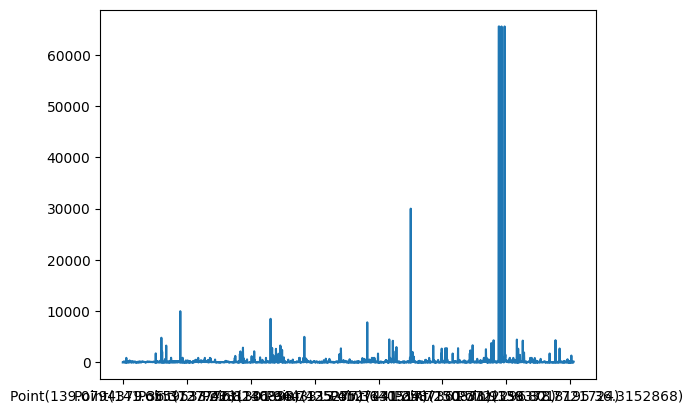

In [ ]:
maxValueInEachColumn.plot()  #point the maximum values recorded by each sensor.

__Observation:__ we can see many sensors have recorded high PM2.5 values greater than 250. Such values are generally outliers/abnormalities and are not useful for the analysis.

##### Step 3.3.2: Replacing the values greater than 250 to zero.

<Axes: >

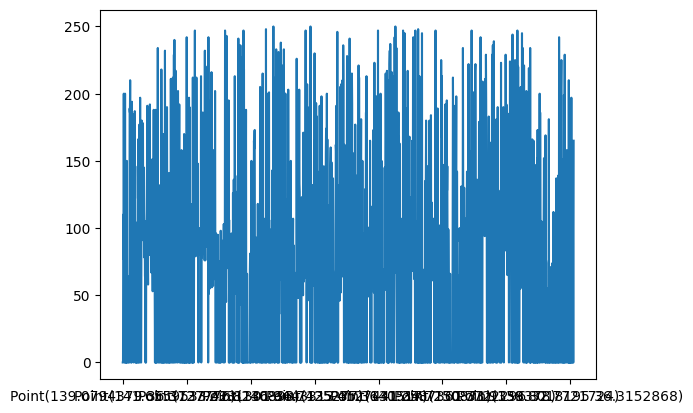

In [ ]:
dataset.where(dataset <= 250, 0, inplace=True)
dataset.max().plot()

__Observation:__ We can notice that the maximum values of every sensor are no more than the 250 value.

We will now check for the minimum values recorded by the sensors.

##### Step 3.3.3: Finding the minimum values recorded by each sensor

<Axes: >

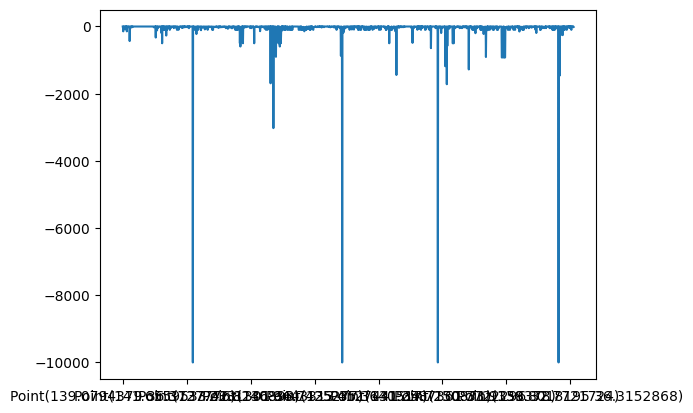

In [ ]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()  #ploting them

#dataset.min().plot()      #memory efficient approach

__Observation:__ We can observe that many sensors have recorded negative PM2.5 values. Thus, we replace the negative PM2.5 values of each sensor with Zero

##### Step 3.3.4: Replacing the values less than zero to 0

<Axes: >

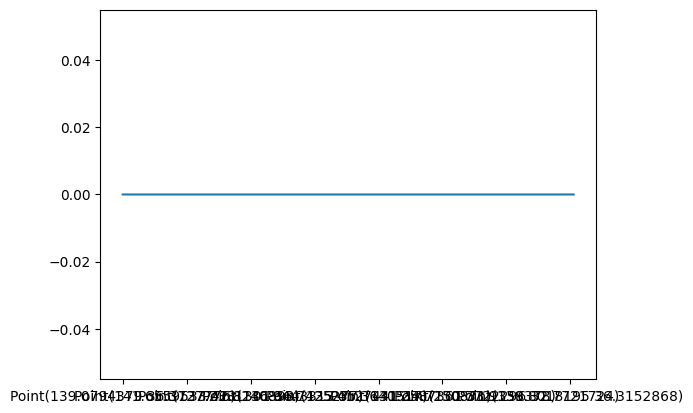

In [ ]:
dataset.where(dataset > 0, 0, inplace=True)
dataset.min().plot()

__Observation:__ The abnormal values were replaced to 0.

#### Step 3.4:  Create a dataframe of the sensors having pm25 >= 15
(useful to prune those sensors that do not record any pm2.5 value)

In [ ]:
thresholdValue = 15
pm25 = pd.DataFrame(columns=["long", "lat", "pm25"])
for col in dataset[1:]:
    res = [i for i in dataset[col].values if i >= thresholdValue]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            #print("Hey")
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            pm25 = pm25._append({'long': float(long), 'lat': float(lat), 'pm25': len(res)}, ignore_index=True)
pm25.head()

,long,lat,pm25
0,139.096021,36.404732,8204.0
1,139.042873,36.381603,8999.0
2,138.995512,36.338016,13929.0
3,139.342672,36.410566,12667.0
4,139.381732,36.290913,10391.0


#### Step 3.5: Drawing the frequency heatmap of sensors

The frequency heatmap provides cruical information regarding how frequently a particular sensor has recorded harmful levels of pollution

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(pm25, lat = 'lat', lon = 'long', z = 'pm25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

__Inference from the above figure:__  High PM2.5 levels were frequently observed at the south part of Japan, starting from Tokyo.  

#### Step 3.6: Printing the heat map of maximum PM2.5 value recorded by each sensor

In [ ]:
maxPM25 = pd.DataFrame(columns=["long", "lat", "maxPM25"])
for col in dataset[1:]:
    res = [i for i in dataset[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            maxPM25 = maxPM25._append({'long': float(long), 'lat': float(lat), 'maxPM25': max(res)}, ignore_index=True)
maxPM25.head()

import pandas as pd
import plotly.express as px

fig = px.density_mapbox(maxPM25, lat = 'lat', lon = 'long', z = 'maxPM25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

### Step 4: Installing the latest version of PAMI package

In [ ]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.4/803.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=84c8f86d7e9d434c2c67c286920d6ad963acc1eb00f360db359794d97b25ae93
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3310 sha256=1dcda683cb10ccb23cc7b1bd39abed2298ee2f3f10133f5ed859553f95d62e38
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4750 sha256=7b43219ded4b611ecb873a92fd42b339b5352c8eb2d37cb936b7705cf18e83da
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully

### Step 5: Converting the data frame into a transactional database

In [ ]:
from PAMI.extras.DF2DB import denseDF2DB as db
obj = db.denseDF2DB(dataset, '>=', 35)
obj.createTransactional('PM24HeavyPollutionRecordingSensors.csv')

### Step 5: Printing the statistics of the database

Database size (total no of transactions) : 31462
Number of items : 1119
Minimum Transaction Size : 1
Average Transaction Size : 16.545896637213147
Maximum Transaction Size : 503
Standard Deviation Transaction Size : 39.73276427461552
Variance in Transaction Sizes : 1578.7427362530073
Sparsity : 0.9852136759274235


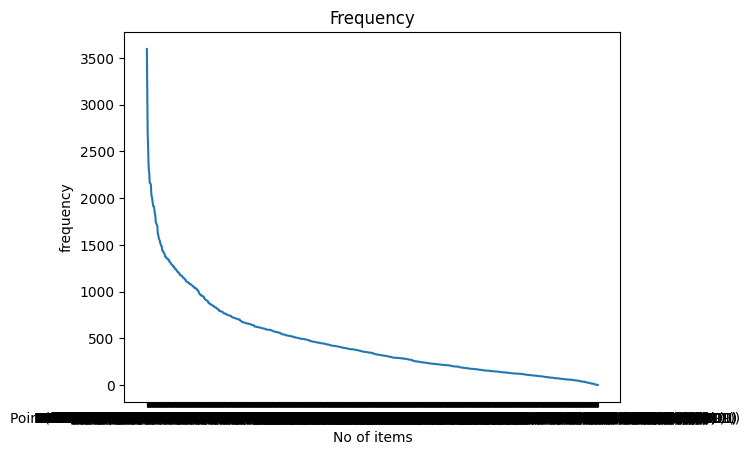

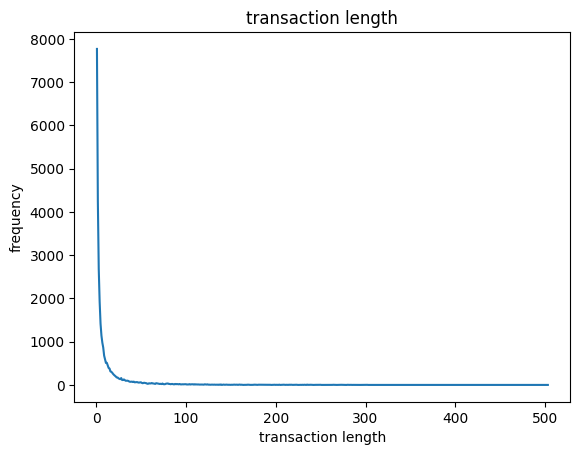

In [ ]:
from PAMI.extras.dbStats import transactionalDatabaseStats as tds
obj = tds.transactionalDatabaseStats('PM24HeavyPollutionRecordingSensors.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Step 6: Mining Frequent Patterns using FP-growth algorithm

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as ab
obj = ab.FPGrowth('PM24HeavyPollutionRecordingSensors.csv', 0.01)
obj.startMine()
obj.printResults()
obj.save('soramame_frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 13894
Total Memory in USS: 350568448
Total Memory in RSS 397037568
Total ExecutionTime in ms: 16.034661531448364


### Step 7: Visualization of Generated Patterns

In [ ]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('soramame_frequentPatterns.txt',50)
obj.visualize(width=1000,height=900)

Number 	 Pattern
2	Point(130.6939898 33.89368080000001)	Point(130.8968264 33.9422417)	Point(130.2527462 33.5854231)	Point(130.850335 33.8863949)	Point(130.8293822 33.8952617)
3	Point(130.6939898 33.89368080000001)	Point(130.8968264 33.9422417)	Point(130.2527462 33.5854231)	Point(130.850335 33.8863949)	Point(130.8073796 33.9015062)
4	Point(130.6939898 33.89368080000001)	Point(130.8968264 33.9422417)	Point(130.850335 33.8863949)	Point(130.8073796 33.9015062)	Point(130.8293822 33.8952617)
5	Point(130.6939898 33.89368080000001)	Point(130.850335 33.8863949)	Point(130.2527462 33.5854231)	Point(130.8293822 33.8952617)	Point(130.8073796 33.9015062)
6	Point(130.8968264 33.9422417)	Point(130.9805349 33.77587159999999)	Point(130.8293822 33.8952617)	Point(130.850335 33.8863949)	Point(130.8073796 33.9015062)
7	Point(130.3165995 33.5738695)	Point(130.6939898 33.89368080000001)	Point(130.3812873 33.5573435)	Point(130.3597423 33.5840497)	Point(130.4285519 33.6066763)
8	Point(130.3165995 33.5738695)	Po

References:


1.   RAGE, Uday kiran (2023), “5+ Years of Multiple Time Series Data of Hourly PM2.5 Recordings Gathered from Various Sensors Located throughout Japan (1-1-2018 to 25-4-2023)”, Mendeley Data, V1, doi: 10.17632/phgrnvykmr.1
2.   PAMI: PAttern Mining toolkit. https://github.com/UdayLab/PAMI

